# This file is for developing and using yolov5 for detecting images on test machines

## Setup

Check setup for use.

In [3]:
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5  c933683 torch 1.10.1+cpu CPU


Setup complete 


## Detect chess pieces on picture and return prediction

This document uses`detect.py` and saves `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

The following command will try to detect chess pieces on a test picture not known to the model in `../testfiles/<img.jpg>`.

All the trained models can be found either in their run in `yolov5/runs/train/<run>/weights/<best.pt>` or if they are used in detection also in `weights/customWeights/<model.pt>`.
They are named after the convention: `<modelName>_<run>`. An example would be: `best_300epochsYolov5x`.
```shell
!python3 detect.py --weights <path>/<chessModel.pt> # the model that is used to detect the objects on the image
                   --img 416 # the dimensions of the image
                   --conf 0.25 # the confidence threshhold that is set
                   --source ../testfiles/<img.jpg> # the path the the image that is used for detection
```

In [4]:
# The detection is now used on the image IMG; best so far: best_Big_300ep_yolov5x-X
# !python3 detect.py --weights weights/customWeights/best_Big_150ep_yolov5n.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/last_Big_150ep_yolov5n.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/best_Big_300ep_yolov5n.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/last_Big_300ep_yolov5n.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/best_Big_150ep_yolov5x.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/last_Big_150ep_yolov5x.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/best_Big_300ep_yolov5x.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/
# !python3 detect.py --weights weights/customWeights/last_Big_300ep_yolov5x.pt --img 416 --conf 0.25 --source ../datasets/Chess-Pieces_big/test/images/

/Users/seebasti/Projects/ChessCamera/venv/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
detect: weights=['weights/customWeights/best_Big_150ep_yolov5n.pt'], source=../datasets/Chess-Pieces_big/test/images/, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 af7025c torch 1.10.1 CPU

Fusing layers... 
Model Summary: 213 layers, 1775401 parameters, 0 gradients, 4.2 GFLOPs
image 1/110 /Users/seebasti/Projects/ChessCamera/datasets/Chess-Pieces_big/test/images/02f0931b536dfba10affc3231a3d64fb_jpg.rf.094f88865cd16ee37e305aaa773347be.jpg: 416x416 1 white-bishop, Done. 

Show the image with the detected objects.

## Preprocess test files before processing with model

In [2]:
import glob
from PIL import Image, ImageOps
count = 1
images = []
for f in glob.glob("../testfiles/*.jpeg"):
    im = Image.open(f)
    images.append(im)
for f in images:
    f = ImageOps.exif_transpose(f)
    f.resize((416, 416))
    f.save('../testFiles/stretched/IMG'+str(count)+'.jpeg')
    print(f.size) # Output: (416, 416)
    count+=1

(3024, 4032)
(3024, 4032)
(3024, 4032)


# Run Inference
Run on `yolov5n6` model with 300 epochs

In [12]:
!python3 detect.py --weights runs/train/Big_400ep_yolov5n6/weights/best.pt --img 416 --conf 0.1 --source ../datasets/Chess-Pieces_big/test/images/

detect: weights=['runs/train/Big_300ep_yolov5n6/weights/best.pt'], source=../datasets/Chess-Pieces_big/test/images/, imgsz=[488, 488], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  c933683 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model Summary: 280 layers, 3108508 parameters, 0 gradients, 4.3 GFLOPs
image 1/110 D:\MachineLearning\ChessCamera\datasets\Chess-Pieces_big\test\images\02f0931b536dfba10affc3231a3d64fb_jpg.rf.094f88865cd16ee37e305aaa773347be.jpg: 512x512 1 white-bishop, Done. (0.012s)
image 2/110 D:\MachineLearning\ChessCamera\datasets\Chess-Pieces_big\test\images\0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.b7882bd1f6d824a9590b653bbb8e2d5e.jp

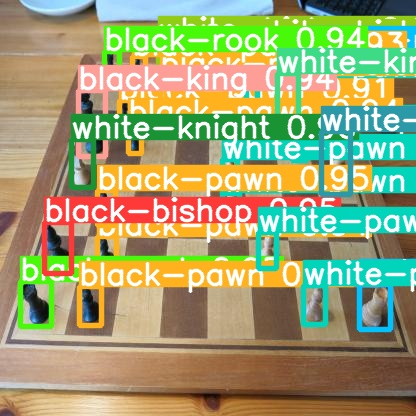

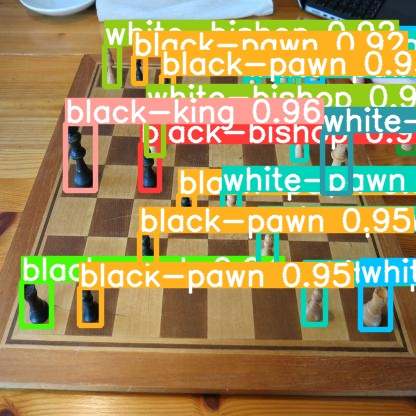

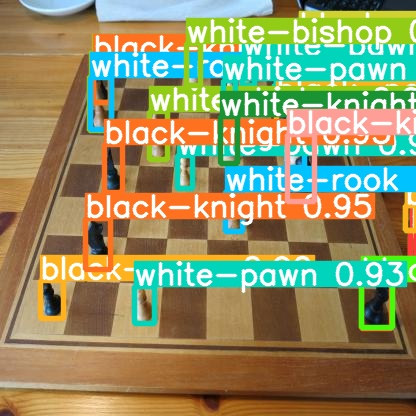

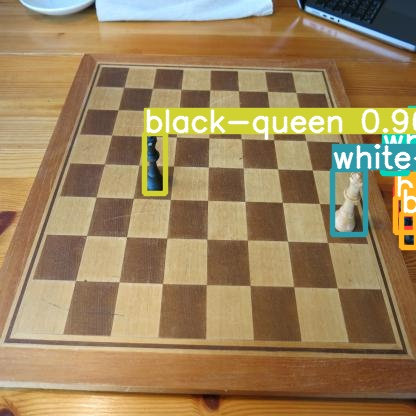

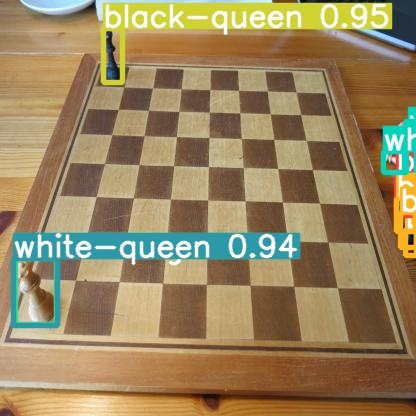

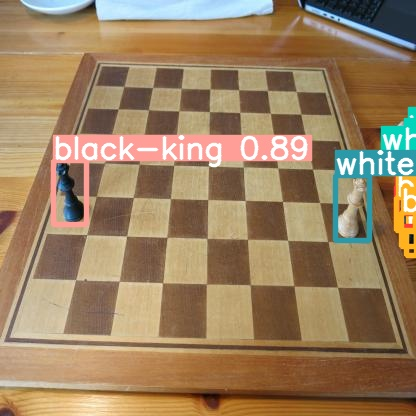

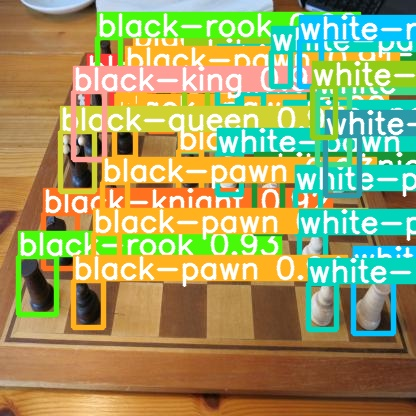

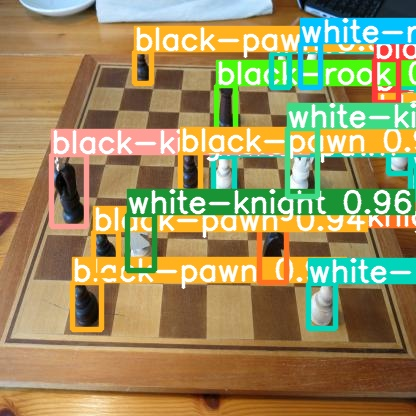

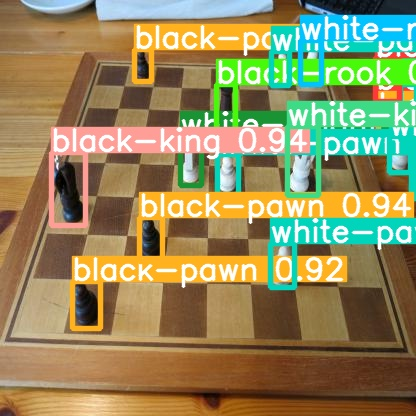

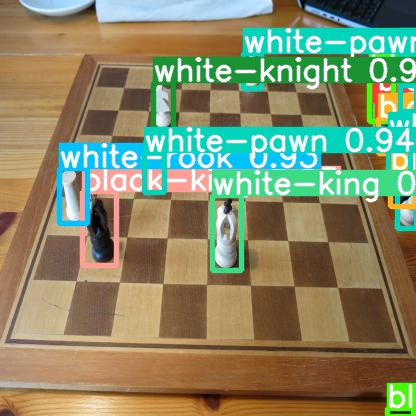

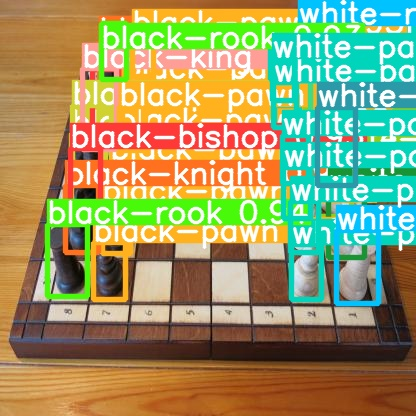

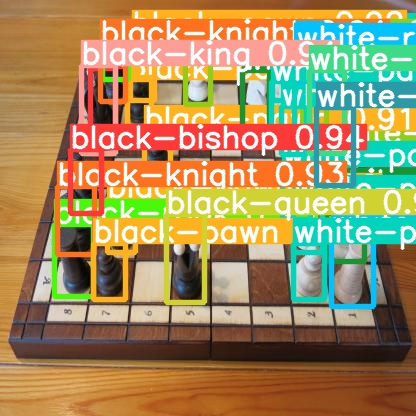

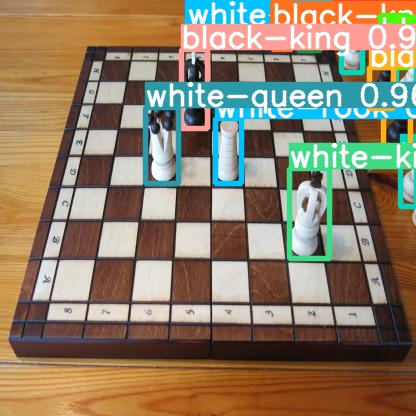

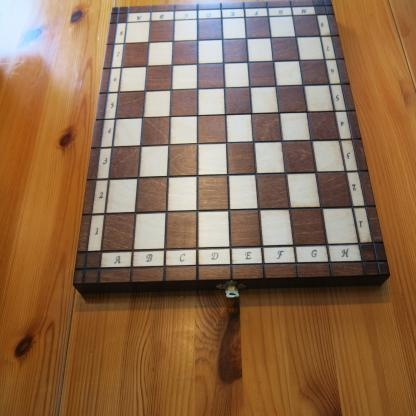

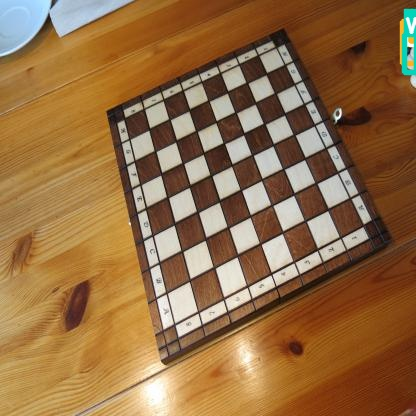

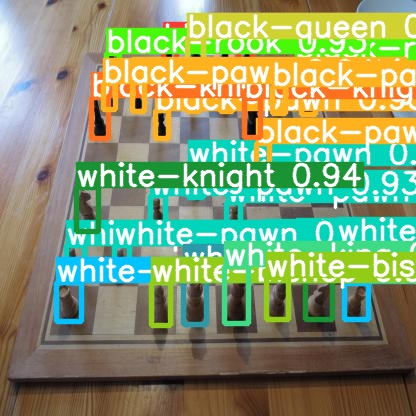

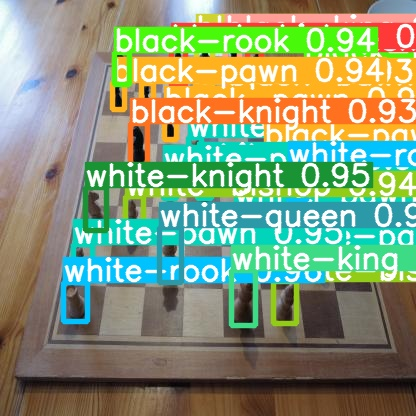

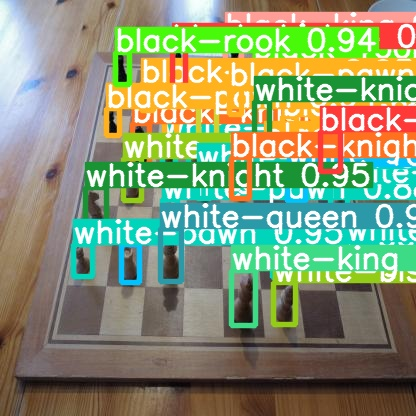

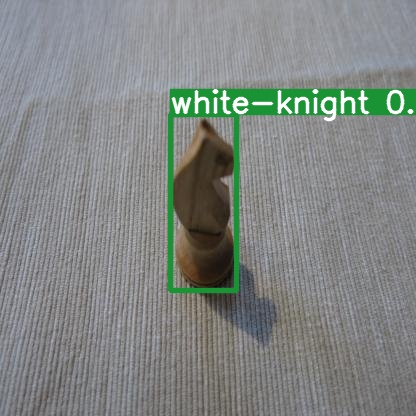

In [15]:
#display inference on a few pictures

import glob
from IPython.display import Image, display
count = 0
for imageName in glob.glob('runs/detect/exp/*.jpg'):
    if count > 85 and count < 105:
      display(Image(filename=imageName))
      print("\n")
      count+=1
    else:
        count+=1